In [1]:
import sys
import os

os.chdir('..')
os.getcwd()

'/Users/malthepabst/Documents/GitHub/ANLP-Project'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset sizes

In [3]:
easy_train = pd.read_csv('data/processed/easy/train_easy.csv')
hard_train = pd.read_csv('data/processed/hard/train_hard.csv')

In [4]:
easy_train.shape[0], hard_train.shape[0]

(192680, 156208)

In [5]:
easy_train['word_count'] = easy_train['Easy'].apply(lambda x: len(x.split(' ')))
easy_train['char_count'] = easy_train['Easy'].apply(lambda x: len(x))
print(f"Number of sen: {easy_train.shape[0]}")
print(f"Number of words: {easy_train['word_count'].sum()}")
print(f"Number of chars: {easy_train['char_count'].sum()}")
print(f"Avg length of sentence: {easy_train['char_count'].mean()}")

Number of sen: 192680
Number of words: 2334502
Number of chars: 12952446
Avg length of sentence: 67.22257629229811


In [6]:
hard_train['word_count'] = hard_train['Hard'].apply(lambda x: len(x.split(' ')))
hard_train['char_count'] = hard_train['Hard'].apply(lambda x: len(x))
print(f"Number of sen: {hard_train.shape[0]}")
print(f"Number of words: {hard_train['word_count'].sum()}")
print(f"Number of chars: {hard_train['char_count'].sum()}")
print(f"Avg length of sentence: {hard_train['char_count'].mean()}")

Number of sen: 156208
Number of words: 2382861
Number of chars: 13698753
Avg length of sentence: 87.69559177506913


# Read data

In [7]:
bins = []
for i in range(1, 32, 3):
    frm = 1*i
    to = frm+3
    bins.append(list(range(frm,to)))

bins_mapping = {}
order = {}
count = 0
ticks = []

for i in bins:
    bin = f"{i[0]}-{i[-1]}"
    ticks.append(bin)
    for x in i:
        bins_mapping[x] = bin
    order[bin] = count
    count += 1

In [8]:
baseline_easy = pd.read_csv('analysis/Easy_baseline_stats.csv', index_col= 'Unnamed: 0')
baseline_easy['model'] = 'Baseline Easy'
baseline_easy = baseline_easy.dropna()
print('Baseline Easy', baseline_easy.shape)
baseline_hard = pd.read_csv('analysis/Hard_baseline_stats.csv', index_col= 'Unnamed: 0')
baseline_hard['model'] = 'Baseline Hard'
baseline_hard = baseline_hard.dropna()
print('Baseline Hard', baseline_hard.shape)

#LSTM
lstm_easy = pd.read_csv('analysis/test_aggregated_Easy.csv')
lstm_easy = lstm_easy.rename({'Avg_Edit_Distance': 'avg',
                              'Word': 'word',
                              'Frequency': 'freq',
                              'Length': 'len'}, axis = 1)
lstm_easy['model'] = 'LSTM Easy'
lstm_easy = lstm_easy.dropna()
print('LSTM Easy', lstm_easy.shape)
lstm_hard = pd.read_csv('analysis/test_aggregated_Hard.csv')
lstm_hard = lstm_hard.rename({'Avg_Edit_Distance': 'avg',
                              'Word': 'word',
                              'Frequency': 'freq',
                              'Length': 'len'}, axis = 1)
lstm_hard['model'] = 'LSTM Hard'
lstm_hard = lstm_hard.dropna()
print('LSTM Hard', lstm_hard.shape)

data = pd.concat([baseline_easy, baseline_hard, lstm_hard, lstm_easy])

Baseline Easy (44590, 5)
Baseline Hard (51892, 5)
LSTM Easy (44590, 5)
LSTM Hard (51892, 5)


In [10]:
data['bin'] = data['len'].replace(bins_mapping)
data['order'] = data['bin'].replace(order)

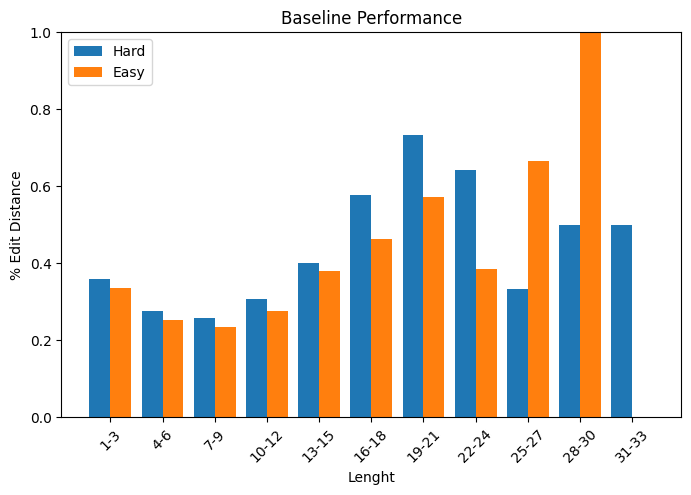

In [11]:
import matplotlib.pyplot as plt
import numpy as np
len_avg = data[['model', 'bin','order' , 'avg']].groupby(['model', 'bin', 'order']).mean().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_avg[len_avg['model'] == 'Baseline Hard']
easy = len_avg[len_avg['model'] == 'Baseline Easy']
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['avg'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['avg'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")
plt.ylim(0,1)

# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('% Edit Distance')
plt.title('Baseline Performance')
plt.legend()
plt.savefig('figures/baseline_performance.png', bbox_inches = 'tight')
plt.show()

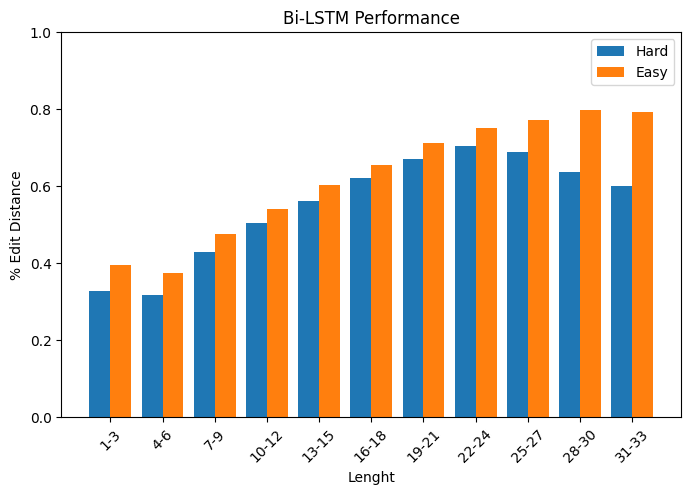

In [12]:
len_avg = data[['model', 'bin','order' , 'avg']].groupby(['model', 'bin', 'order']).mean().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_avg[len_avg['model'] == 'LSTM Hard']
easy = len_avg[len_avg['model'] == 'LSTM Easy']
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['avg'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['avg'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")
plt.ylim(0,1)
# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('% Edit Distance')
plt.title('Bi-LSTM Performance')
plt.legend()
plt.savefig('figures/lstm_performance.png', bbox_inches = 'tight')
plt.show()

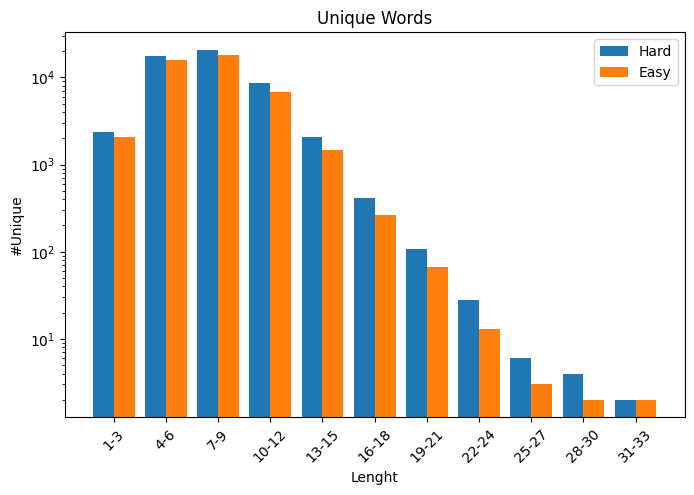

In [13]:
len_frq = data[['model', 'bin','order' , 'freq']].groupby(['model', 'bin', 'order']).count().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_frq[len_frq['model'] == 'Baseline Hard']
easy = len_frq[len_frq['model'] == 'Baseline Easy']
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['freq'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['freq'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")
plt.yscale('log')
# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('#Unique')
plt.title('Unique Words')
plt.legend()
plt.savefig('figures/unique_word.png', bbox_inches = 'tight')

plt.show()